# Mushroom Classification
https://www.kaggle.com/uciml/mushroom-classification/data
<br>～形状や生息地等の特性からキノコが食用か有毒かを識別する～

### 1.要約
キノコの外見から毒性を判断するための機械学習モデルを制作する。当課題は、スキルアップAI株式会社が提供する、日本ディープラーニング協会認定プログラムである現場で使える機械学習・データ分析基礎講座の課題である。

#### 本データセットはUCI Machine Learning Repositoryを利用
本制作では、University of California, Irvineが提供するUCI Machine Learning RepositoryからMushroom Data Set（The Audubon Society Field Guide to North American Mushrooms(1981) G. H. Lincoff (Pres.), New York: Alfred A. Knopf）を利用する。データセットはデータ投稿・分析のプラットフォームであるkaggleにアカウントを作成し、取得する。

#### データセットには23種類のキノコのデータが含まれる。
データセットの内容はハラタケ属、キツネノカラカサ属に属する23種類のキノコの属性情報（図表１）、それぞれのクラス（食用・毒性）が示されている。

<center>（図表1）キノコの属性情報</center>

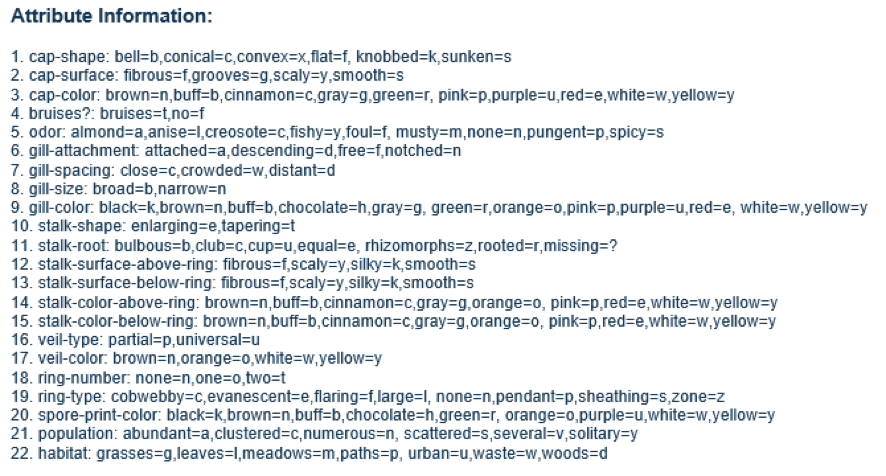

出所）UCI Machine Learning Repository

#### 形状や生息地等の属性情報からキノコが食用か有毒かを識別する。
当課題では、形状や生息地等の属性情報からキノコが食用か有毒かを識別する。

<center>（図表2）キノコの属性情報</center>
![test.png](attachment:test.png)
出所）札幌市　野や山のきのこハンドブック

### 2. 目的変数と説明変数の関係を確認するためのグラフを作成する。

#### 目的変数は予測したい変数、説明変数は目的変数を説明する変数。属性情報の中でも関連の高い属性情報を説明変数として採用する。
目的変数は予測したい変数、説明変数は目的変数を説明する変数である。例えば、「男であるか女であるか」という目的変数に対する説明変数の一例は「筋肉量・体脂肪率・身長」と考えることができる。
当課題の場合は、目的変数はキノコの食用・毒性であり、説明変数は、毒性のキノコと相関が高い属性情報である。この属性情報の調査にあたっては22種類の属性情報それぞれについて棒グラフを用い、Y軸を毒性のあるキノコの数、X軸を属性情報とする棒グラフを作成し、属性情報の中でも関連の高い属性情報を説明変数として採用する。

In [ ]:
%matplotlib inline 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from IPython.display import display
from dateutil.parser import parse

from sklearn import linear_model
from sklearn.metrics import mean_squared_error, mean_absolute_error
from IPython.display import display

In [ ]:
#まずはデータの内容を確認する。
df_data = pd.read_csv("../1_data/mushrooms.csv")
print(df_data.columns)
display(df_data.head())
display(df_data.tail())

In [ ]:
# coutn missing
pd.DataFrame(df_data.isnull().sum(), columns=["num of missing"])

In [ ]:
#上記処理では欠損値は見つけられず。

In [ ]:
# corss tab %
for col in df_data.columns:
    if col=="class":
        continue
    print(col)
    df_c = pd.crosstab(index=df_data["class"], columns=df_data[col],margins=True,normalize=True)
    display(df_c)
    df_cross_show = df_c.T.sort_values(by=['All'], ascending=False)
    df_cross_show.plot.bar()
    plt.show()


#### 3. 目的変数を説明するのに有効そうな説明変数を見つける。

In [ ]:
# corss tab % 相関が高い変数を再度表示し、その中から3つに絞る。

df_c = pd.crosstab(index=df_data["class"], columns=df_data["bruises"],margins=True,normalize=True)
display(df_c)
df_cross_show = df_c.T.sort_values(by=['All'], ascending=False)
df_cross_show.plot.bar()
plt.show()

df_c = pd.crosstab(index=df_data["class"], columns=df_data["odor"],margins=True,normalize=True)
display(df_c)
df_cross_show = df_c.T.sort_values(by=['All'], ascending=False)
df_cross_show.plot.bar()
plt.show()

df_c = pd.crosstab(index=df_data["class"], columns=df_data["gill-size"],margins=True,normalize=True)
display(df_c)
df_cross_show = df_c.T.sort_values(by=['All'], ascending=False)
df_cross_show.plot.bar()
plt.show()

df_c = pd.crosstab(index=df_data["class"], columns=df_data["gill-color"],margins=True,normalize=True)
display(df_c)
df_cross_show = df_c.T.sort_values(by=['All'], ascending=False)
df_cross_show.plot.bar()
plt.show()

df_c = pd.crosstab(index=df_data["class"], columns=df_data["stalk-root"],margins=True,normalize=True)
display(df_c)
df_cross_show = df_c.T.sort_values(by=['All'], ascending=False)
df_cross_show.plot.bar()
plt.show()

df_c = pd.crosstab(index=df_data["class"], columns=df_data["stalk-surface-above-ring"],margins=True,normalize=True)
display(df_c)
df_cross_show = df_c.T.sort_values(by=['All'], ascending=False)
df_cross_show.plot.bar()
plt.show()

df_c = pd.crosstab(index=df_data["class"], columns=df_data["ring-type"],margins=True,normalize=True)
display(df_c)
df_cross_show = df_c.T.sort_values(by=['All'], ascending=False)
df_cross_show.plot.bar()
plt.show()


#### 4. 欠測値と異常値を確認し、適切に処理する（前処理で習ったことを利用して）。

In [ ]:
#欠損値と異常値の確認
#stalk-rootの?をnにする。
df_data = df_data.replace('?', 'n')

#確認
df_c = pd.crosstab(index=df_data["class"], columns=df_data["stalk-root"],margins=True,normalize=True)
display(df_c)
#?はnになっていることを確認。

#### 5. DAY1で学んだアルゴリズムを利用する。

##### 5-1.質的変数をダミー変数に置き換える。

In [ ]:
#これらに関してはonehot encodingを使うことにする。
df_en = pd.concat([df_data,pd.get_dummies(df_data['bruises'])],axis=1)
df_en = df_en.drop(['ring-type','spore-print-color','population','habitat'],axis=1)
df_en = df_en.drop(['bruises','gill-color','stalk-shape','stalk-root','cap-shape','cap-surface','cap-color','odor','gill-attachment','gill-spacing','gill-size','stalk-color-below-ring','veil-type','veil-color','ring-number'],axis=1)
df_en = df_en.drop(['stalk-surface-above-ring','stalk-surface-below-ring','stalk-color-above-ring'],axis=1)

df_en = df_en.drop(['f'],axis=1)#bruises の有無をtで表す。

df_en['class'] = pd.concat([df_data,pd.get_dummies(df_data['class'])],axis=1)
df_en = df_en.drop(['class'],axis=1)
df_en['class_2'] = np.array(df_data['class'] != 0)*1

display(df_en)

In [ ]:
y = ((df_data.bruises > 0) * 1).values

plt.plot(X.df_data,y,'o')

lr = LinearRegression()

lr.fit(X.bruises.reshape(-1,1),y)

plt.plot(range(X.bruises.min(),X.bruises.max()),lr.coef_*range(X.bruises.min(),X.bruises.max())+lr.intercept_)

plt.xlabel('bruises')
plt.ylabel('class')

In [ ]:
df_data["class"].value_counts().sort_index().head()
